In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/demand-forecasting-kernels-only/sample_submission.csv
/kaggle/input/demand-forecasting-kernels-only/train.csv
/kaggle/input/demand-forecasting-kernels-only/test.csv


In [2]:
train=pd.read_csv("/kaggle/input/demand-forecasting-kernels-only/train.csv",parse_dates=["date"])

train.shape
test=pd.read_csv("/kaggle/input/demand-forecasting-kernels-only/test.csv",parse_dates=["date"])
test.shape

(45000, 4)

In [3]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [4]:
train.describe




<bound method NDFrame.describe of              date  store  item  sales
0      2013-01-01      1     1     13
1      2013-01-02      1     1     11
2      2013-01-03      1     1     14
3      2013-01-04      1     1     13
4      2013-01-05      1     1     10
...           ...    ...   ...    ...
912995 2017-12-27     10    50     63
912996 2017-12-28     10    50     59
912997 2017-12-29     10    50     74
912998 2017-12-30     10    50     62
912999 2017-12-31     10    50     82

[913000 rows x 4 columns]>

In [5]:
train.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [6]:
target=train['sales']
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.

train['Year'] = train['date'].dt.strftime('%Y')
train['Month'] = train['date'].dt.strftime('%m')
train['day'] = train['date'].dt.strftime('%d')

test['Year'] = test['date'].dt.strftime('%Y')
test['Month'] = test['date'].dt.strftime('%m')
test['day'] = test['date'].dt.strftime('%d')

test.describe



<bound method NDFrame.describe of           id       date  store  item  Year Month day
0          0 2018-01-01      1     1  2018    01  01
1          1 2018-01-02      1     1  2018    01  02
2          2 2018-01-03      1     1  2018    01  03
3          3 2018-01-04      1     1  2018    01  04
4          4 2018-01-05      1     1  2018    01  05
...      ...        ...    ...   ...   ...   ...  ..
44995  44995 2018-03-27     10    50  2018    03  27
44996  44996 2018-03-28     10    50  2018    03  28
44997  44997 2018-03-29     10    50  2018    03  29
44998  44998 2018-03-30     10    50  2018    03  30
44999  44999 2018-03-31     10    50  2018    03  31

[45000 rows x 7 columns]>

In [7]:
train.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
Year             object
Month            object
day              object
dtype: object

In [8]:
train['day']= label_encoder.fit_transform(train['day'])
train['Year']= label_encoder.fit_transform(train['Year'])
train['Month']= label_encoder.fit_transform(train['Month'])
target=label_encoder.fit_transform(target)

test['day']= label_encoder.fit_transform(test['day'])
test['Year']= label_encoder.fit_transform(test['Year'])
test['Month']= label_encoder.fit_transform(test['Month'])


train.dtypes



date     datetime64[ns]
store             int64
item              int64
sales             int64
Year              int64
Month             int64
day               int64
dtype: object

In [9]:
corr=train.corr()
corr

/tmp/ipykernel_20/897721491.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=train.corr()


,store,item,sales,Year,Month,day
store,1.000000e+00,7.276042e-15,-0.008170,-1.971350e-16,-4.500688e-16,-4.920966e-16
item,7.276042e-15,1.000000e+00,-0.055998,-1.017161e-14,4.093306e-15,-2.945987e-14
sales,-8.170361e-03,-5.599807e-02,1.000000,1.823597e-01,8.741417e-02,2.791264e-03
Year,-1.971350e-16,-1.017161e-14,0.182360,1.000000e+00,-5.080291e-04,5.841665e-04
Month,-4.500688e-16,4.093306e-15,0.087414,-5.080291e-04,1.000000e+00,1.079604e-02
day,-4.920966e-16,-2.945987e-14,0.002791,5.841665e-04,1.079604e-02,1.000000e+00


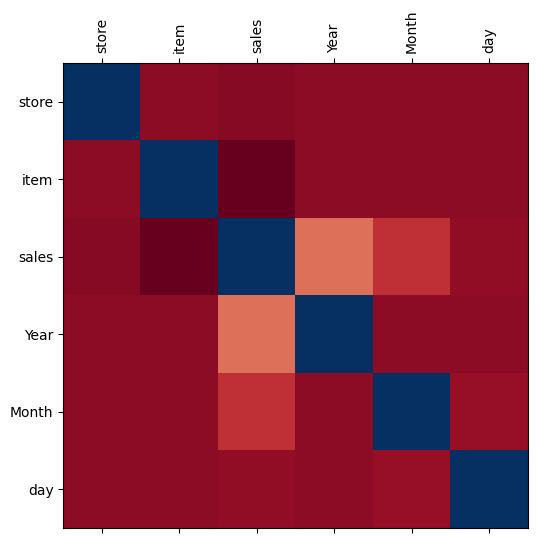

In [10]:
fig = plt.figure(figsize=(6,6))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

In [11]:
del train['sales']



In [12]:
del test['date']

In [13]:
del train['date']

In [14]:
del test['id']

In [15]:
train.dtypes

store    int64
item     int64
Year     int64
Month    int64
day      int64
dtype: object

In [16]:
train.describe

<bound method NDFrame.describe of         store  item  Year  Month  day
0           1     1     0      0    0
1           1     1     0      0    1
2           1     1     0      0    2
3           1     1     0      0    3
4           1     1     0      0    4
...       ...   ...   ...    ...  ...
912995     10    50     4     11   26
912996     10    50     4     11   27
912997     10    50     4     11   28
912998     10    50     4     11   29
912999     10    50     4     11   30

[913000 rows x 5 columns]>

In [17]:
model=XGBClassifier()
model.fit(train,target)
y_pred=model.predict(test)

In [18]:
y_pred

array([11, 11, 10, ..., 74, 74, 67])

In [19]:
test=pd.read_csv("/kaggle/input/demand-forecasting-kernels-only/test.csv",parse_dates=["date"])
test['id']

0            0
1            1
2            2
3            3
4            4
         ...  
44995    44995
44996    44996
44997    44997
44998    44998
44999    44999
Name: id, Length: 45000, dtype: int64

In [20]:
sample=pd.read_csv("/kaggle/input/demand-forecasting-kernels-only/sample_submission.csv")

In [21]:
dict={'id': test['id'],'sales':(y_pred)}
dict

{'id': 0            0
 1            1
 2            2
 3            3
 4            4
          ...  
 44995    44995
 44996    44996
 44997    44997
 44998    44998
 44999    44999
 Name: id, Length: 45000, dtype: int64,
 'sales': array([11, 11, 10, ..., 74, 74, 67])}

In [22]:
df=pd.DataFrame(dict)
df.describe

<bound method NDFrame.describe of           id  sales
0          0     11
1          1     11
2          2     10
3          3     14
4          4     10
...      ...    ...
44995  44995     53
44996  44996     74
44997  44997     74
44998  44998     74
44999  44999     67

[45000 rows x 2 columns]>

In [23]:
df.to_csv('submission.csv',index=False)